# RounD Trajectory Data Analysis

## Brief Introduction to RounD

RounD is a dataset collected by Aachen University, German. This dataset "contains a total of six hours of recordings with more than 13,746 road users including cars, vans, trucks, buses, pedestrians, bicycles and motorcycles" from three roundabouts.

This repository provides a data sample including less than 5% of the original dataset. It also provides a visualized insight into the dataset. For those interested in accessing the complete dataset, please follow this [link](https://www.round-dataset.com/).

### Trajectory Types in InD

In rounD, trajectories falls into these following categories:

- `bicycle`
- `bus`
- `car`
- `motorcycle`
- `pedestrian`
- `trailer`
- `truck`
- `van`

### Match Trajectory Data with Maps

According to meta records:

- Trajectory data files 00 are recorded in location 1 (denoted as rounD_1)
- Trajectory data files 01 are recorded in location 2 (denoted as rounD_2)
- Trajectory data files 03-23 are recorded in location 0 (denoted as rounD_0). Among them, files 03-08 are recorded in region 0 and files 09-23 are recorded in region 1.

In [1]:
import sys

sys.path.append(".")

import warnings

warnings.filterwarnings("ignore")

import json

import matplotlib.transforms as mtransforms

from utils import levelx

with open("../map/map.config", "r") as f:
    configs = json.load(f)

data_path = "../trajectory/rounD/data"
img_path = "../img/rounD"
trajectory_types = [
    "car",
    "truck",
    "trailer",
    "bus",
    "van",
    "motorcycle",
    "bicycle",
    "pedestrian",
]

## Data Analysis

The data analysis will first present visualizations of both the map and trajectory data and then analysis the speed distribution and lane changing frequency of vehicles, categorized by their types.

### Map and Trajectory Visualization

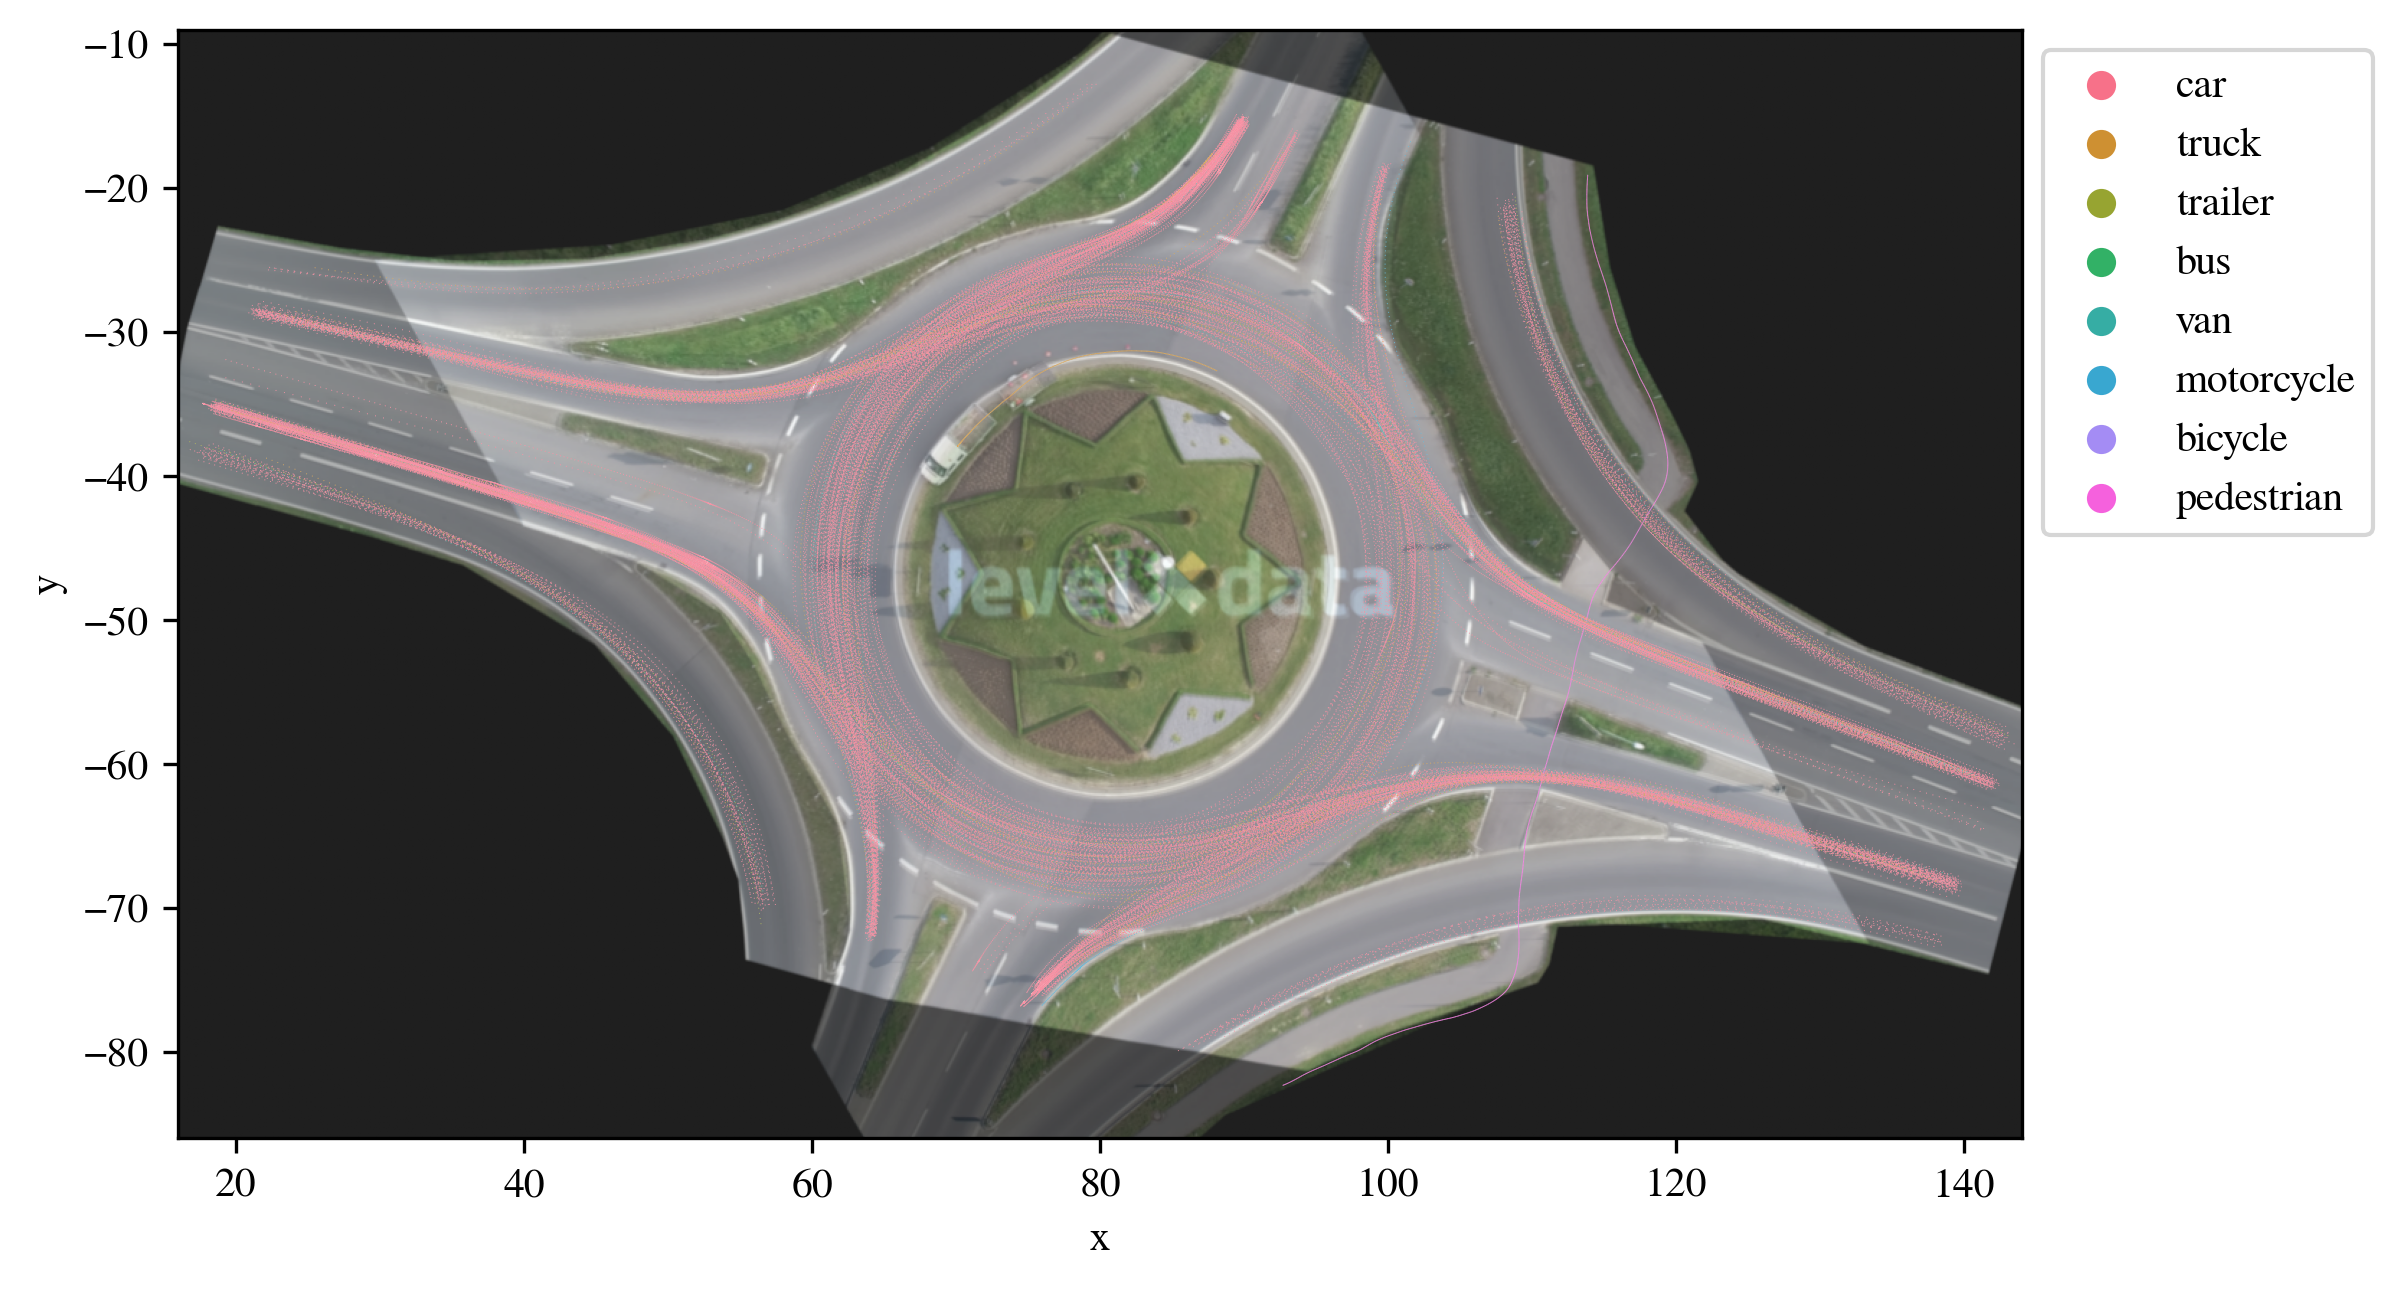

In [2]:
transform0 = mtransforms.Affine2D().scale(0.1).translate(0.5, -95)
levelx.plot_map_and_trajectories(
    "rounD_0", data_path, img_path, transform0, trajectory_types, configs
)

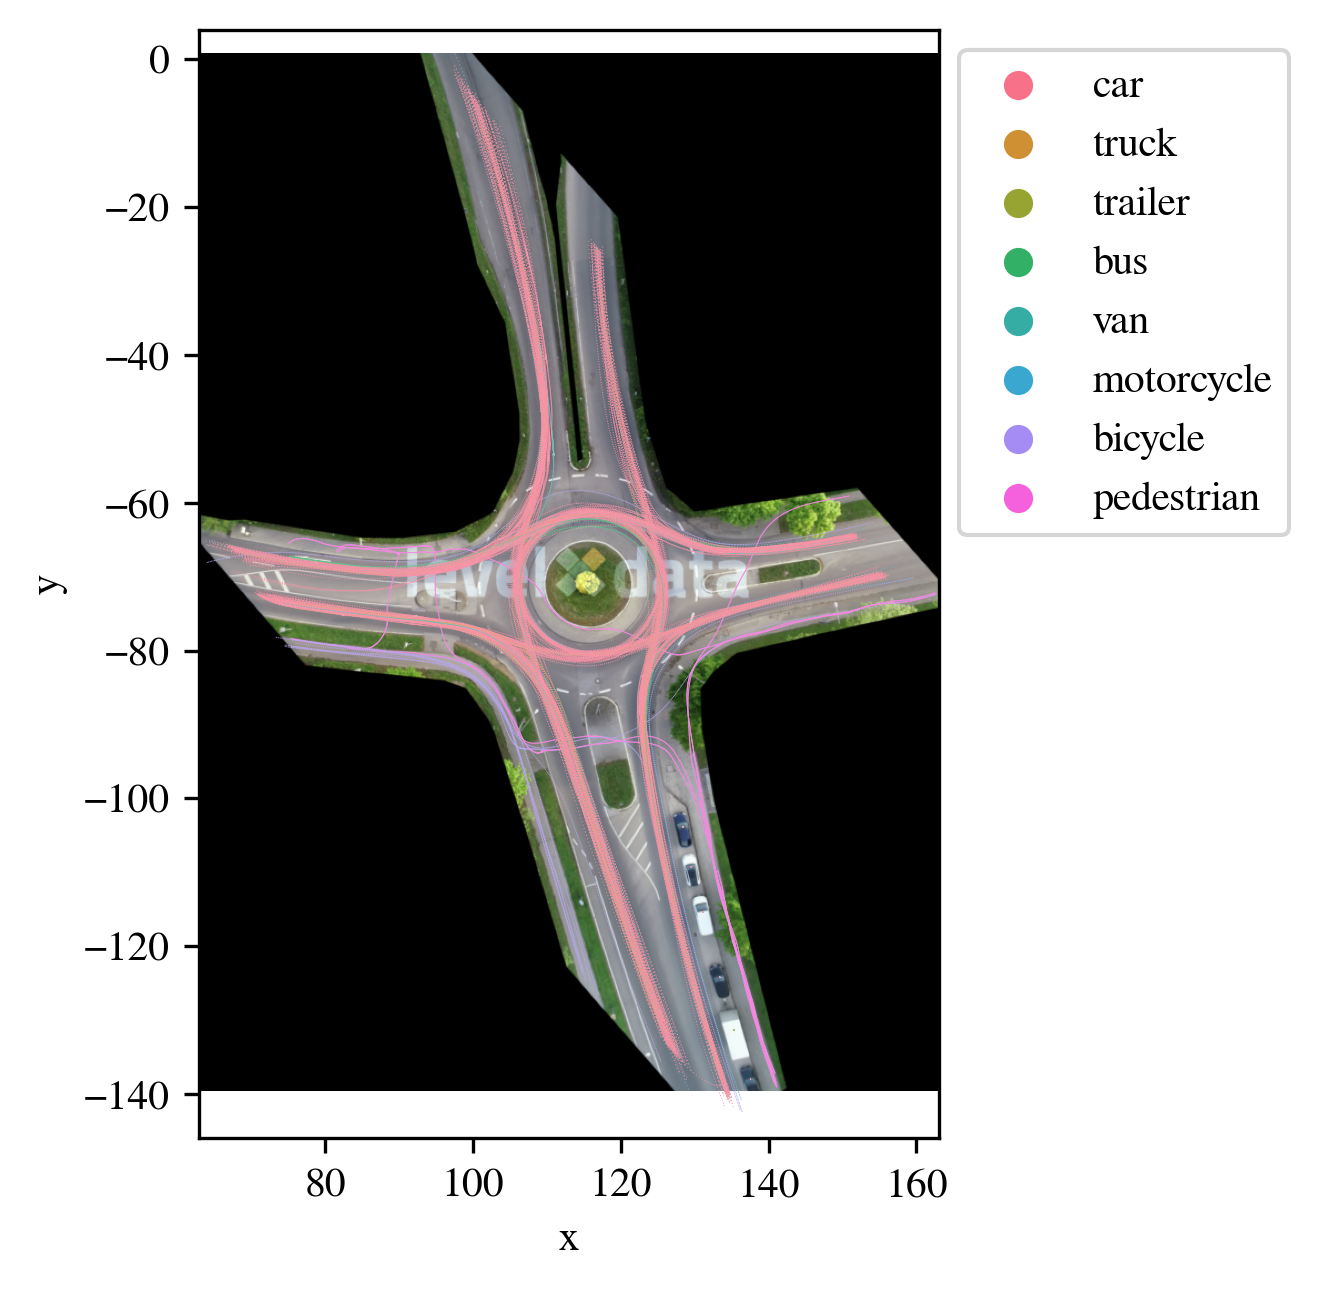

In [3]:
transform1 = mtransforms.Affine2D().scale(0.15).translate(-1.5, -139.5)
levelx.plot_map_and_trajectories(
    "rounD_1", data_path, img_path, transform1, trajectory_types, configs
)

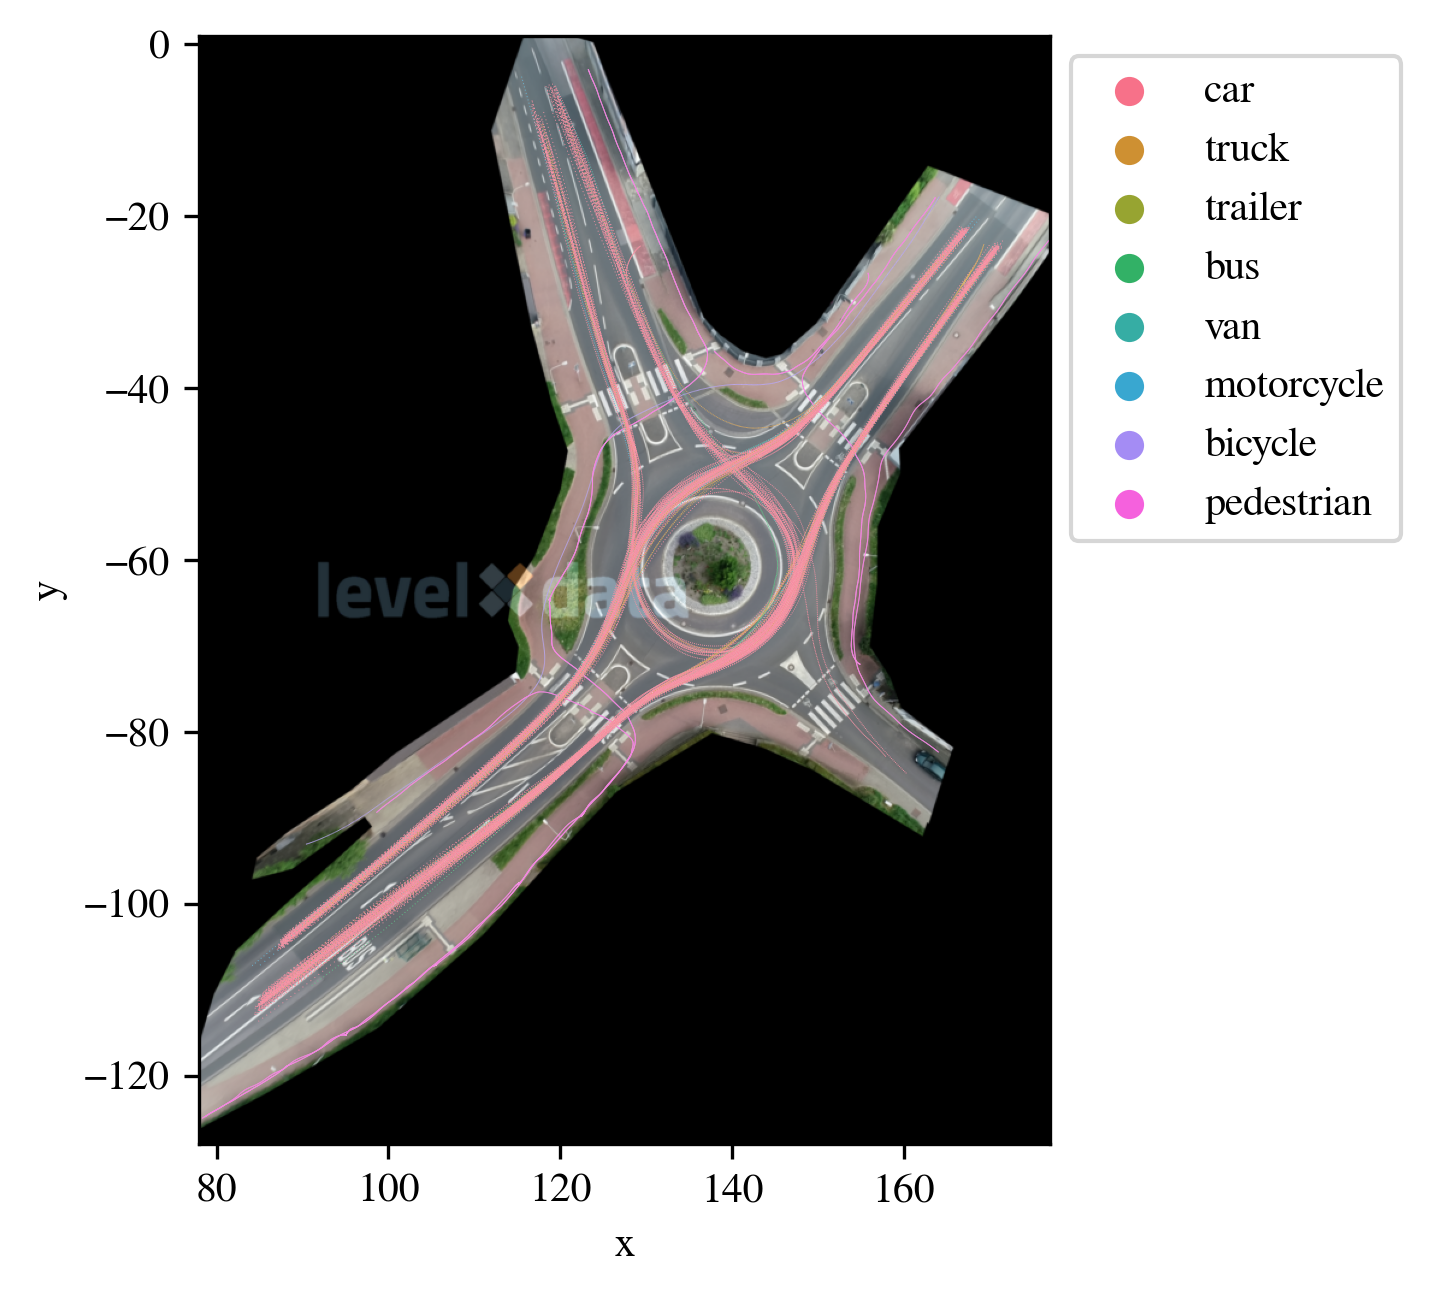

In [4]:
transform2 = mtransforms.Affine2D().scale(0.14).translate(-4.0, -129)
levelx.plot_map_and_trajectories(
    "rounD_2", data_path, img_path, transform2, trajectory_types, configs
)

## Proportion of Trajectory Types

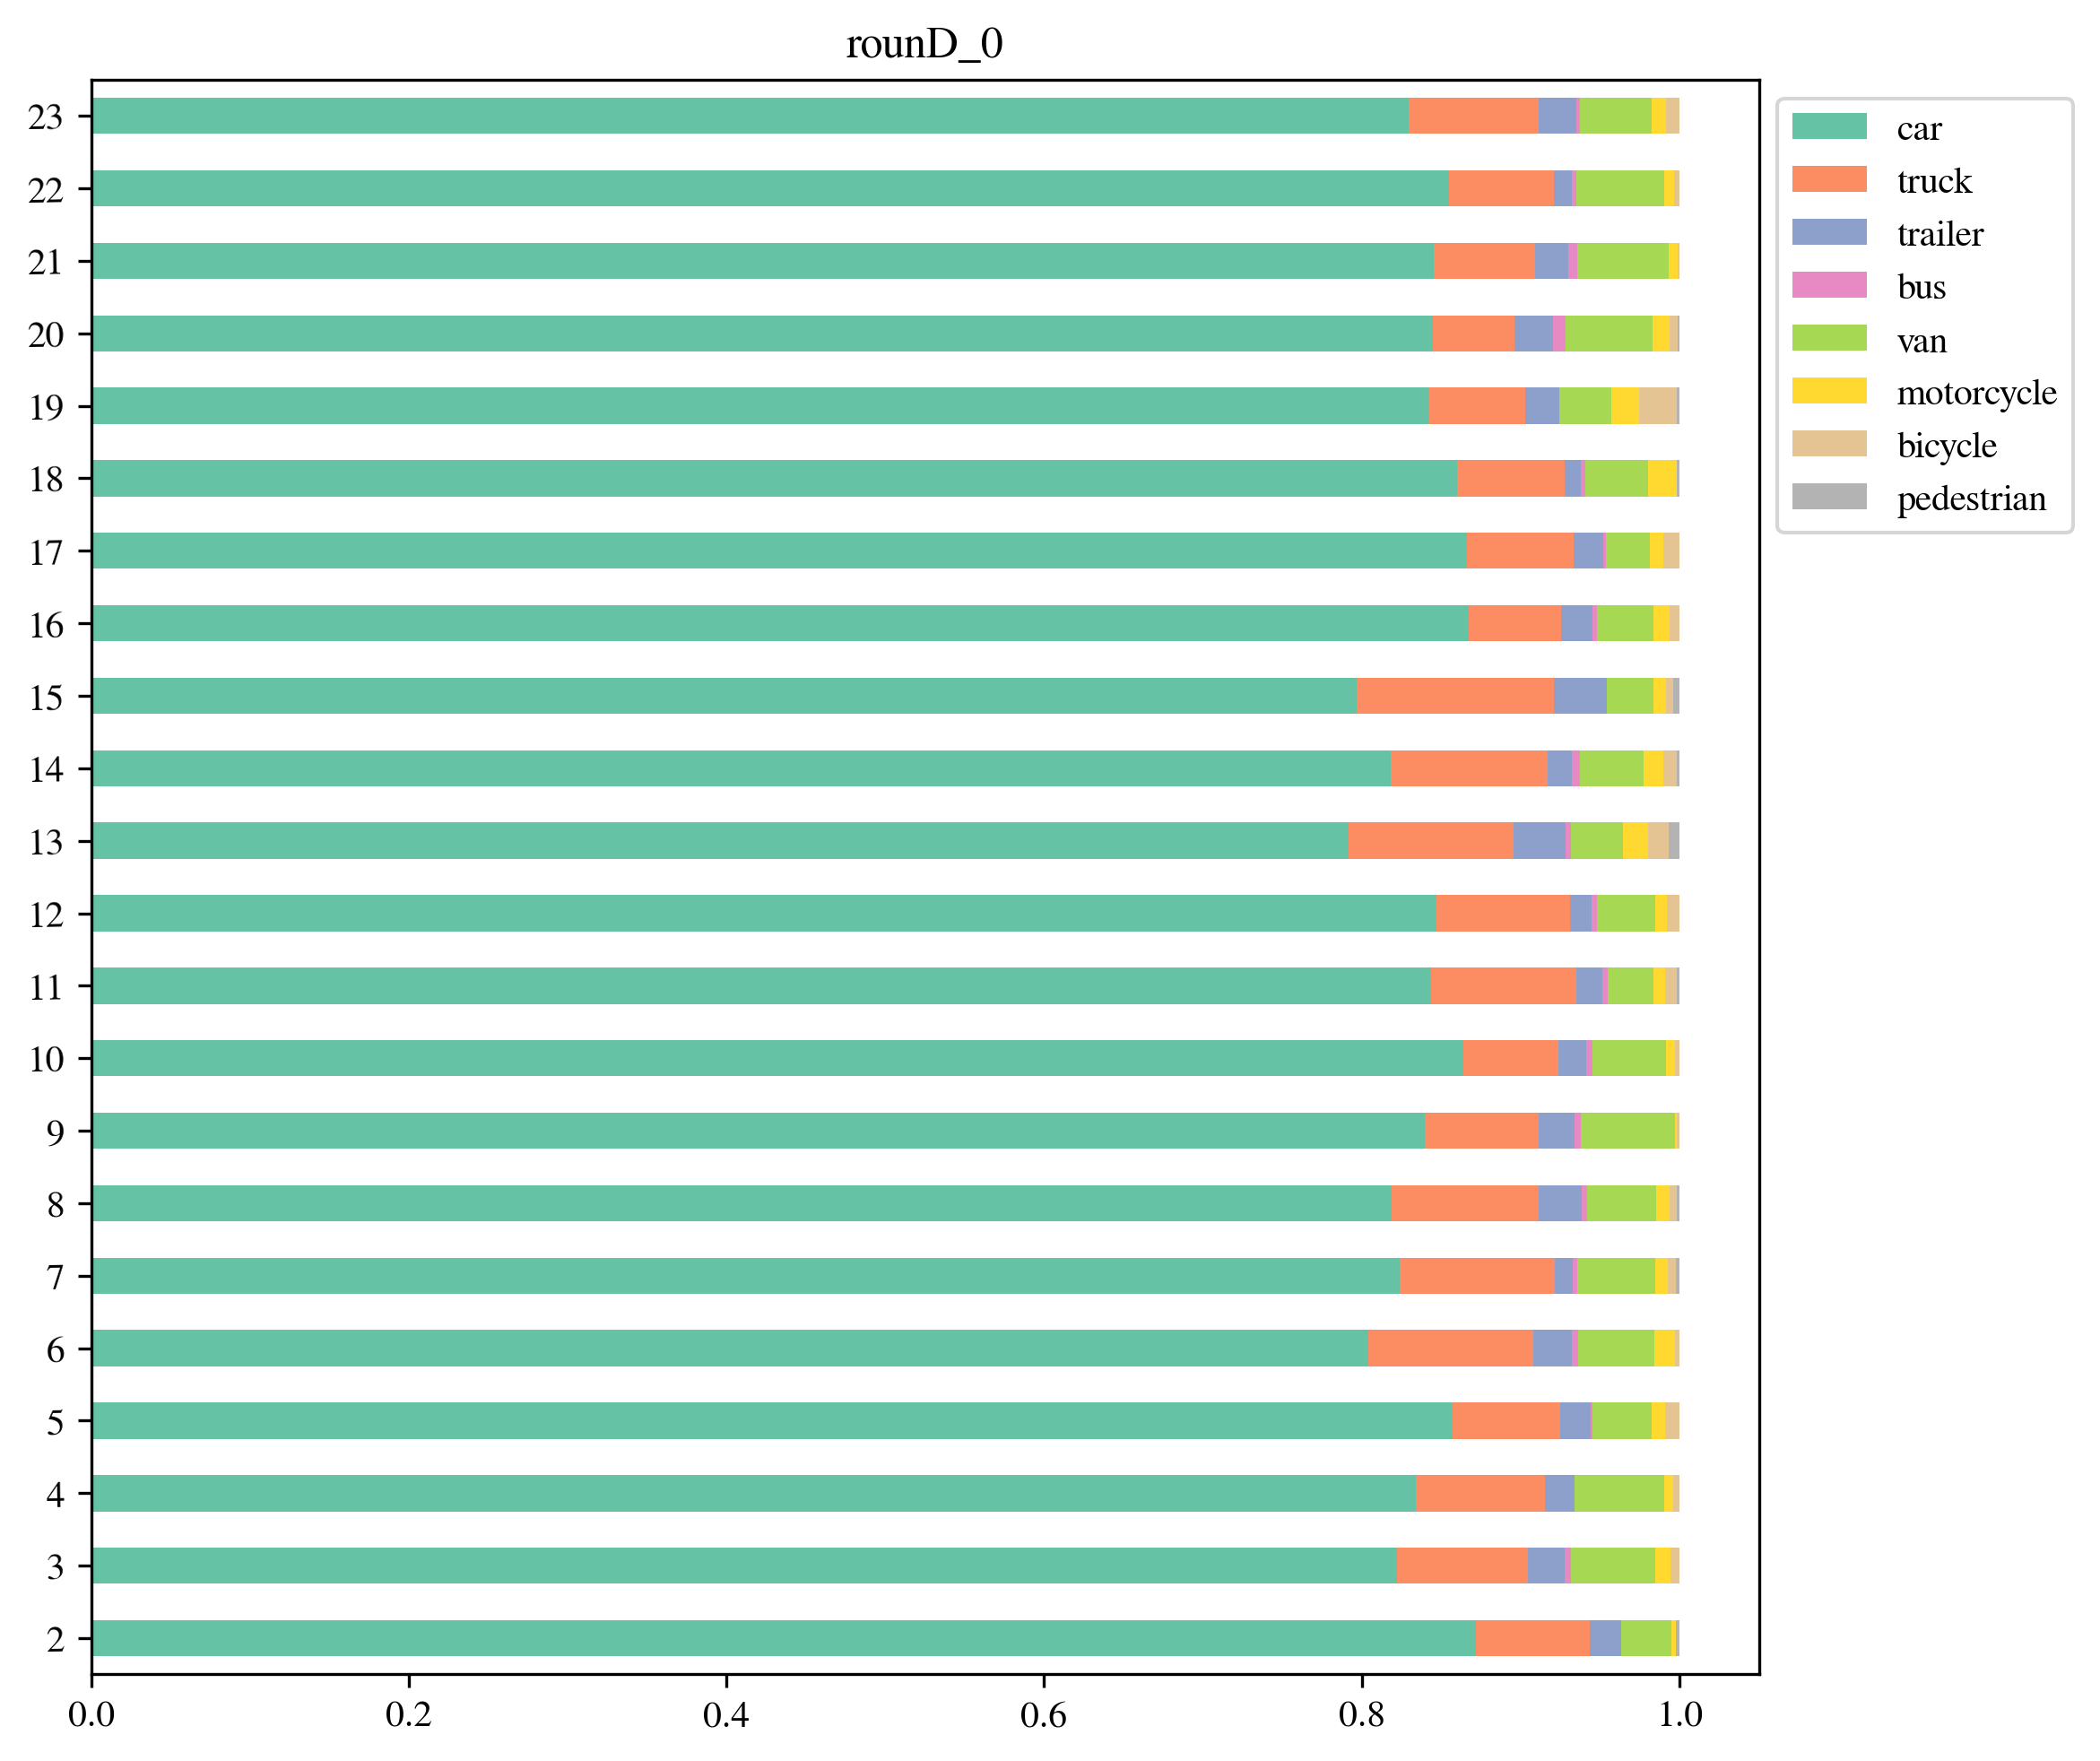

In [5]:
levelx.plot_class_proportion("rounD_0", data_path, trajectory_types, configs)

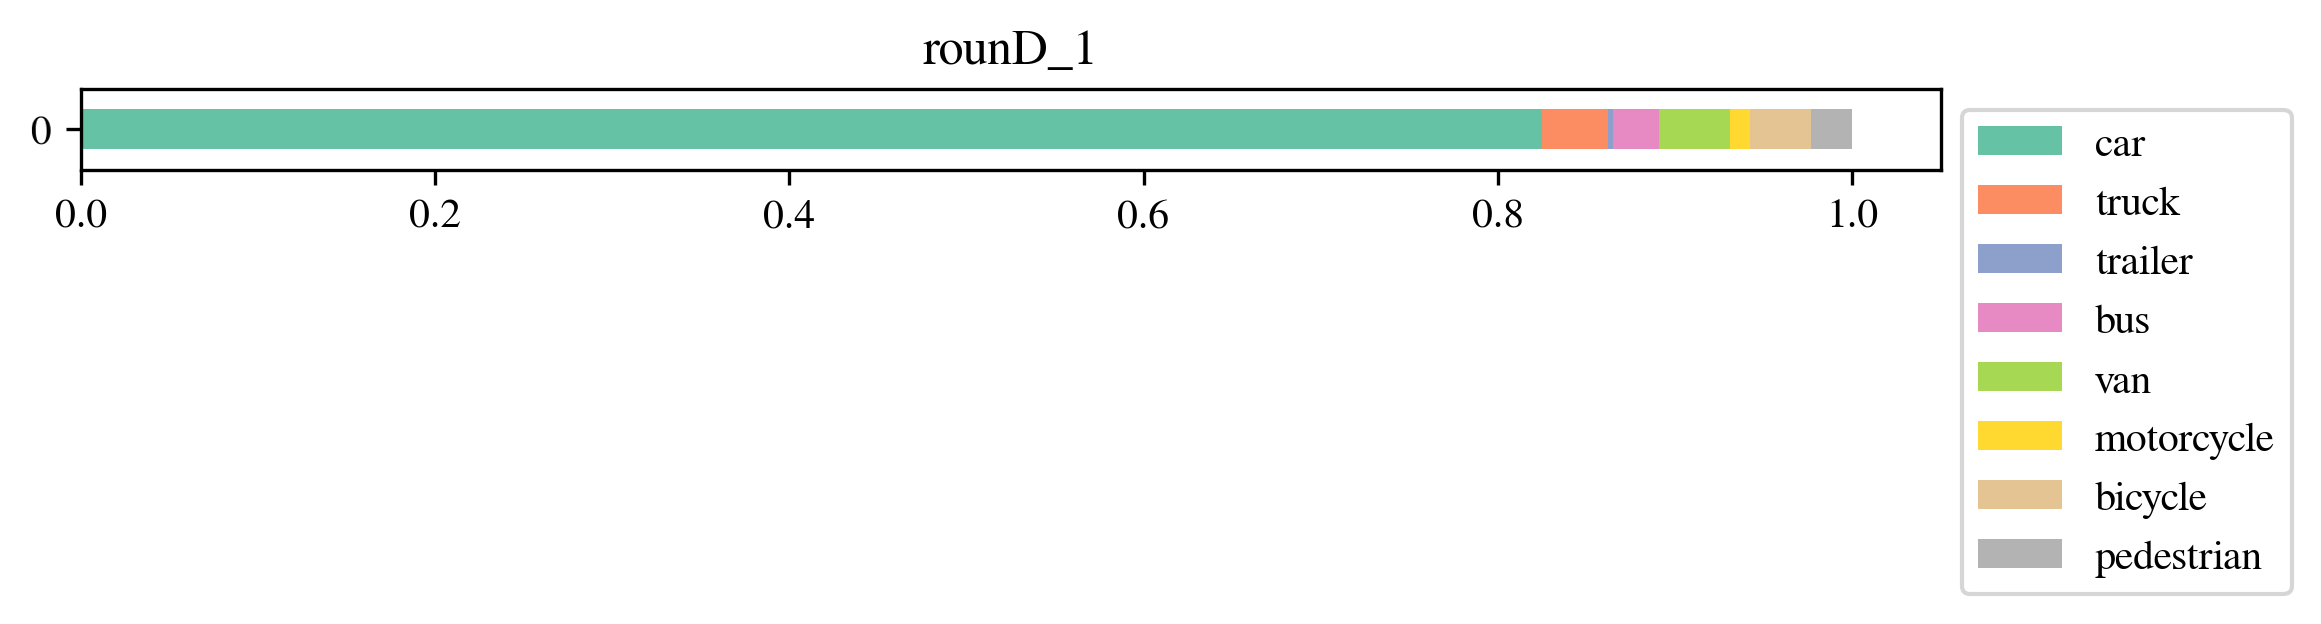

In [6]:
levelx.plot_class_proportion("rounD_1", data_path, trajectory_types, configs)

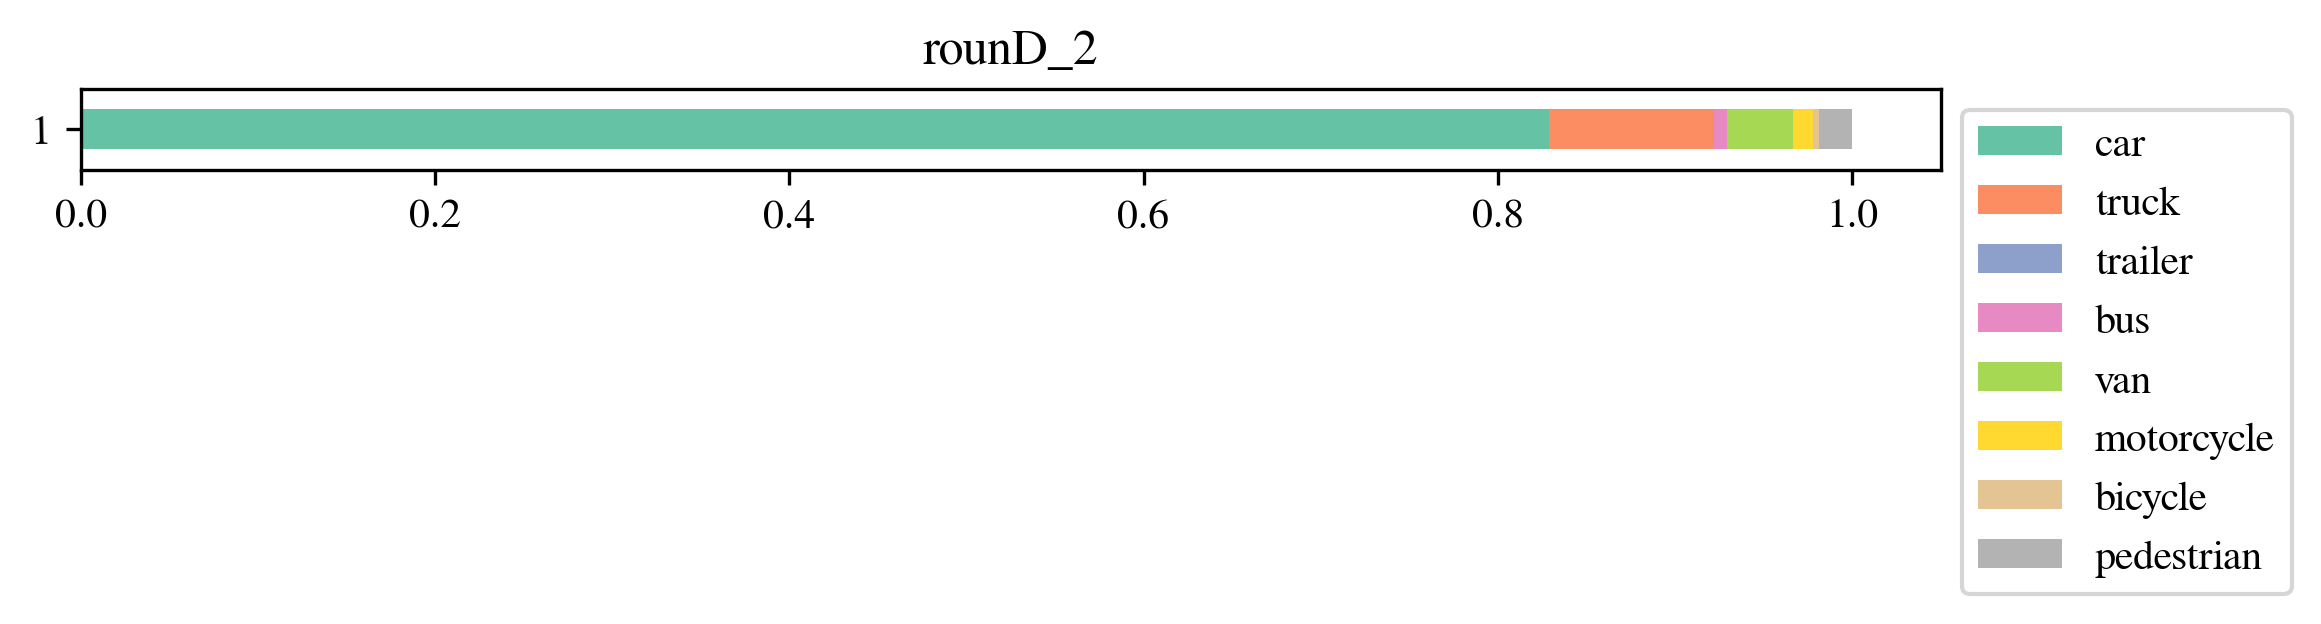

In [7]:
levelx.plot_class_proportion("rounD_2", data_path, trajectory_types, configs)

In [8]:
type_vis(configs[map_list[1]])

NameError: name 'type_vis' is not defined

In [ ]:
type_vis(configs[map_list[2]])

## Speed Distribution

In [ ]:
types = ["bicycle", "bus", "car", "motorcycle", "pedestrian", "bus", "truck", "van"]

In [ ]:
def speed_dist_vis1(map_config):
    for file_id in map_config["track_files"]:
        df = pd.read_csv(
            "../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id)
        )
        types = sorted(df["type"].unique())
        for i, type in enumerate(types):
            sns.distplot(
                df[(df["type"] == type) & (df["v"] > 0.1)]["v"], label=type, hist=False
            )
            fig = plt.gcf()
            fig.set_size_inches((8, 6))
            ax = plt.gca()
            ax.set_title(file_id)
        plt.set_cmap("Set2")
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
        plt.show()

In [ ]:
def speed_dist_vis2(map_config):
    global types
    for type in types:
        for file_id in map_config["track_files"]:
            df = pd.read_csv(
                "../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id)
            )
            sns.distplot(
                df[(df["type"] == type) & (df["v"] > 0.1)]["v"],
                label=file_id,
                hist=False,
            )
            fig = plt.gcf()
            fig.set_size_inches((8, 6))
            ax = plt.gca()
            ax.set_title(type)
        plt.set_cmap("Set2")
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
        plt.show()

In [ ]:
speed_dist_vis1(configs[map_list[0]])

In [ ]:
speed_dist_vis1(configs[map_list[1]])

In [ ]:
speed_dist_vis2(configs[map_list[2]])

## Angle Distribution

In [ ]:
def angle_dist_vis(map_config, type, all_files=False):
    file_list = (
        map_config["track_files"] if all_files else [map_config["track_files"][0]]
    )
    for file_id in file_list:
        df = pd.read_csv(
            "../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id)
        )
        bin_num = 72
        theta = np.linspace(0.0, 2 * np.pi, bin_num, endpoint=False)
        angle = df[df["type"] == type]["angle"]
        for i, a in enumerate(angle):
            if a < 0:
                angle[i] = angle[i] + 2 * np.pi
        radii = np.zeros(bin_num)
        for a in angle:
            radii[int(a / (2 * np.pi / bin_num))] += 1
        ax = plt.subplot(111, polar=True)
        bars = ax.bar(theta, np.log10(radii), width=(2 * np.pi) / bin_num, bottom=4)
        for r, bar in zip(radii, bars):
            bar.set_facecolor("turquoise")
            bar.set_alpha(0.5 + 0.5 * r / sum(radii))
        fig = plt.gcf()
        fig.set_size_inches((6, 6))
        ax = plt.gca()
        ax.set_title(file_id)
        plt.show()

In [ ]:
angle_dist_vis(configs[map_list[0]], "car")

In [ ]:
angle_dist_vis(configs[map_list[0]], "pedestrian")

In [ ]:
angle_dist_vis(configs[map_list[1]], "car")

In [ ]:
angle_dist_vis(configs[map_list[0]], "pedestrian")

The distribution of angle in all track files of map R_rounD_2_DEU are similar, so we only plot the first file.

In [ ]:
angle_dist_vis(configs[map_list[2]], "car")

In [ ]:
def delta_angle_vis(map_config, type, all_files=False):
    file_list = (
        map_config["track_files"] if all_files else [map_config["track_files"][0]]
    )
    for file_id in file_list:
        df = pd.read_csv(
            "../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id)
        )
        df = df[df["type"] == type]
        delta_angle = []
        for veh_id in df["id"].unique():
            sub_angle_list = list(df[df["id"] == veh_id]["angle"])
            for i in range(0, len(sub_angle_list) - 1):
                delta_angle.append(sub_angle_list[i + 1] - sub_angle_list[i])
        sns.distplot(delta_angle, label=file_id, hist=False)
        fig = plt.gcf()
        fig.set_size_inches((8, 6))
        ax = plt.gca()
        ax.set_title(type)
        ax.set_xlim(-np.pi, np.pi)
        plt.set_cmap("Set2")
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
        plt.show()

In [ ]:
delta_angle_vis(configs[map_list[0]], "car")

In [ ]:
delta_angle_vis(configs[map_list[1]], "car")

In [ ]:
delta_angle_vis(configs[map_list[2]], "car")

## Traffic Density

In [ ]:
def traffic_density_vis(map_config):
    for file_id in map_config["track_files"]:
        df = pd.read_csv(
            "../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id)
        )
        count = df.groupby(["frame", "type"]).size().unstack(level=1)
        count.plot(kind="line")
        ax = plt.gca()
        ax.set_xlim([0, 13000])
        ax.set_ylim([0, 20])
        fig = plt.gcf()
        fig.set_size_inches((8, 6))
        plt.set_cmap("Set2")
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
        plt.show()

In [ ]:
traffic_density_vis(configs[map_list[0]])

In [ ]:
traffic_density_vis(configs[map_list[1]])

In [ ]:
traffic_density_vis(configs[map_list[2]])